In [1]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns

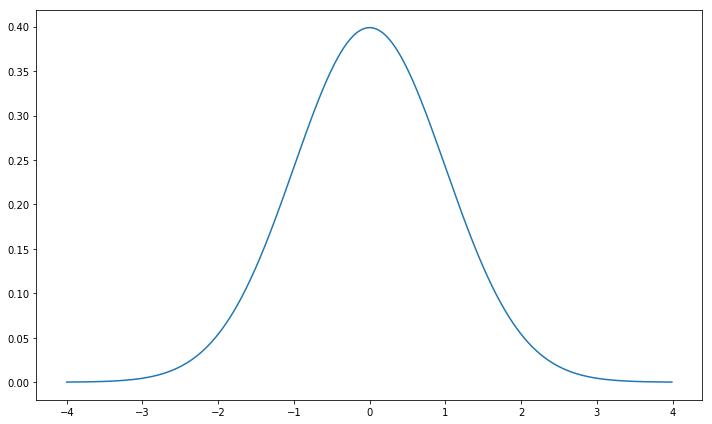

In [2]:
# Plot PDF of normal distribution
x = []
bell_curve = []
for i in np.arange(-4,4,0.01):
    bell_curve.append(norm.pdf(i))
    x.append(i)
    
plt.subplots(figsize=(10,6))
sns.lineplot(x=x, y=bell_curve)
plt.tight_layout()
plt.savefig(fname='normal_dist_2', dpi=150)
plt.show()

In [3]:
# Is the average height more than 6 ft?

mean_height = 5.5*12
stdev_height = 1*12
target = 6*12

height_surveys = np.zeros((10000,10))
for i in range(height_surveys.shape[0]):
    for j in range(height_surveys.shape[1]):
        height_surveys[i,j] = mean_height +\
                              np.random.normal()*stdev_height

print('Mean Height:', round(np.mean(height_surveys)/12,1), 'feet')
print('Standard Deviation of Height:', 
      round(np.var(height_surveys)**0.5/12,1), 'foot')

Mean Height: 5.5 feet
Standard Deviation of Height: 1.0 foot


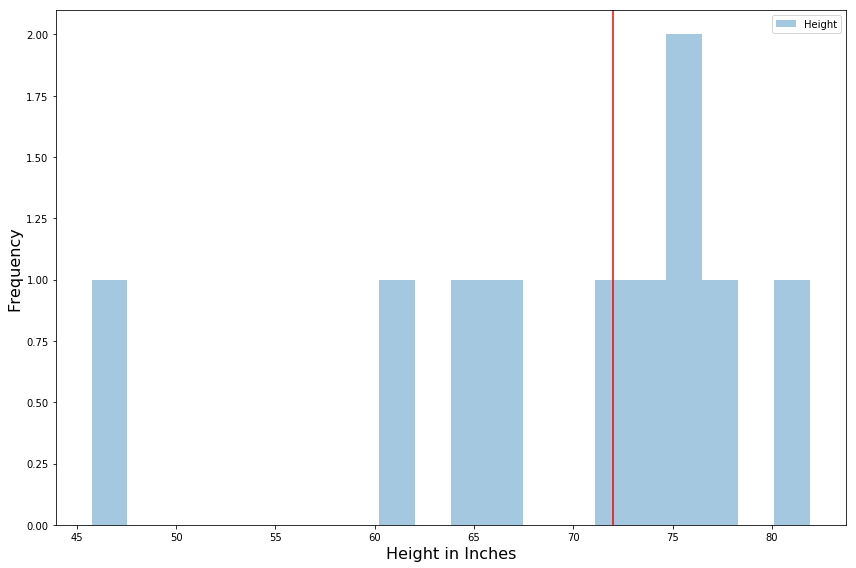

In [4]:
# Histogram that shows the distribution for a single survey
# giants = height_surveys[np.mean(height_surveys, axis=1)==max(np.mean(height_surveys, axis=1))]

fig, ax = plt.subplots(figsize=(12,8))
sns.distplot(height_surveys[35], bins=20, kde=False, label='Height')

ax.set_xlabel("Height in Inches",fontsize=16)
ax.set_ylabel("Frequency",fontsize=16)
plt.axvline(target, color='red')
plt.legend()
plt.tight_layout()

# plt.savefig(fname='height_one_sample_2', dpi=150)
plt.show()

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


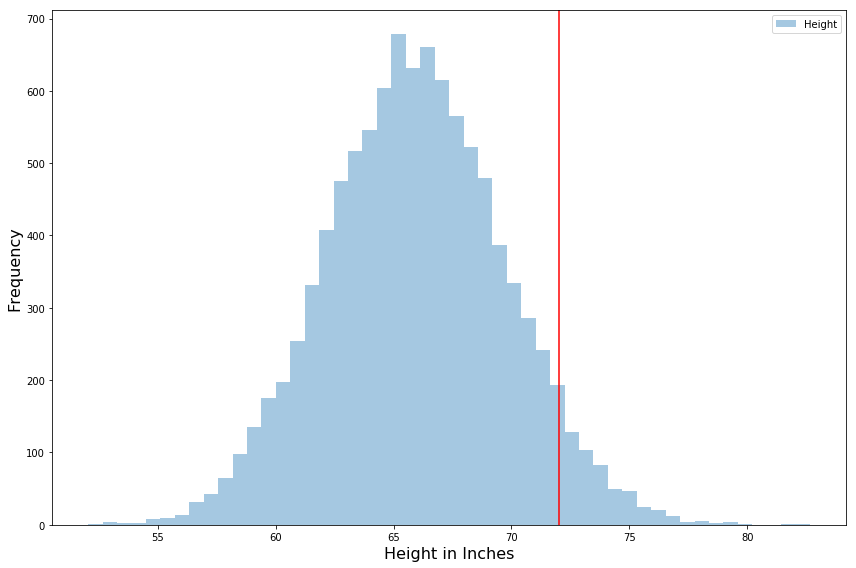

In [5]:
# Histogram that shows the distribution for the mean of all surveys
fig, ax = plt.subplots(figsize=(12,8))
sns.distplot(np.mean(height_surveys,axis=1), 
             kde=False, label='Height')

ax.set_xlabel("Height in Inches",fontsize=16)
ax.set_ylabel("Frequency",fontsize=16)
plt.axvline(target, color='red')
plt.legend()
plt.tight_layout()

plt.savefig(fname='height_all_samples', dpi=150)
plt.show()

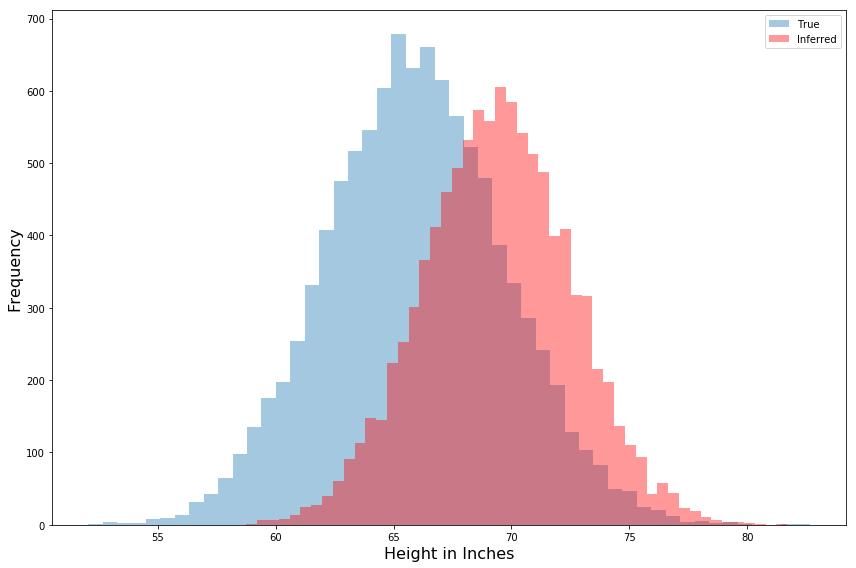

In [6]:
# Compare mean of all surveys with inferred distribution
fig, ax = plt.subplots(figsize=(12,8))

# Plot histogram of 10,000 sample means
sns.distplot(np.mean(height_surveys,axis=1), 
             kde=False, label='True')

# Calculate stats using single sample
sample_mean = np.mean(height_surveys[35])
sample_stdev = np.var(height_surveys[35])**0.5
# Calculate standard error
std_error = sample_stdev/(height_surveys[35].shape[0])**0.5

# Infer distribution using single sample
inferred_dist = [sample_mean + np.random.normal()*\
                 std_error for i in range(10000)]

# Plot histogram of inferred distribution
sns.distplot(inferred_dist, kde=False, 
             label='Inferred', color='red')

ax.set_xlabel("Height in Inches",fontsize=16)
ax.set_ylabel("Frequency",fontsize=16)
plt.legend()
plt.tight_layout()

plt.savefig(fname='height_actual_vs_theory', dpi=150)
plt.show()

In [7]:
# Simulation method for answering the question

# Generate 10,000 random variables
inferred_dist = [sample_mean + np.random.normal()*\
                 std_error for i in range(10000)]

# Figure out how many are > than target
sum([1 for i in inferred_dist if i>=target])/len(inferred_dist)

0.2084

In [8]:
1 - norm.cdf(target, loc=sample_mean, scale=std_error)

0.20588020842515764

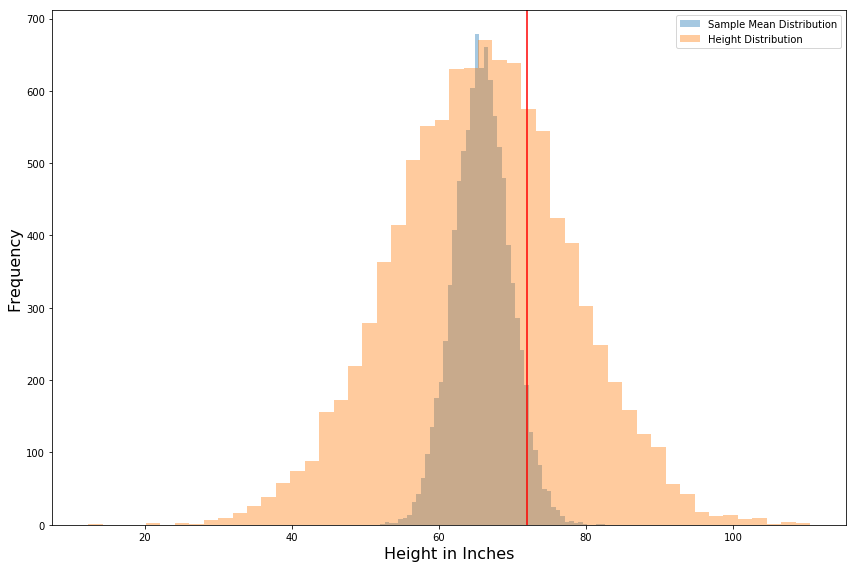

In [9]:
# Histogram that shows the distribution for both mean and some samples
# to illustrate how standard error is more narrow
fig, ax = plt.subplots(figsize=(12,8))
sns.distplot(np.mean(height_surveys,axis=1), kde=False, 
             label='Sample Mean Distribution')
sns.distplot(height_surveys.flatten()[:height_surveys.shape[0]], 
             kde=False, label='Height Distribution')

ax.set_xlabel("Height in Inches",fontsize=16)
ax.set_ylabel("Frequency",fontsize=16)
plt.axvline(target, color='red')
plt.legend()
plt.tight_layout()

plt.savefig(fname='height_all_samples_compare', dpi=150)
plt.show()

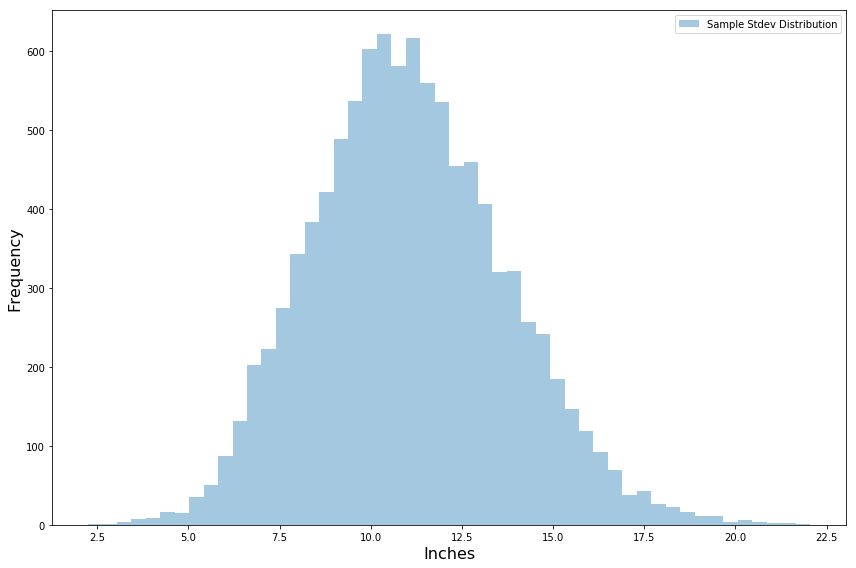

In [10]:
# Check out the distribution of the sample standard deviations
vol_dist = np.var(height_surveys, axis=1)**0.5

# Histogram that shows the distribution of sample stdev
fig, ax = plt.subplots(figsize=(12,8))
sns.distplot(vol_dist, kde=False, 
             label='Sample Stdev Distribution')

ax.set_xlabel("Inches",fontsize=16)
ax.set_ylabel("Frequency",fontsize=16)
plt.legend()
plt.tight_layout()

plt.savefig(fname='vol_dist', dpi=150)
plt.show()

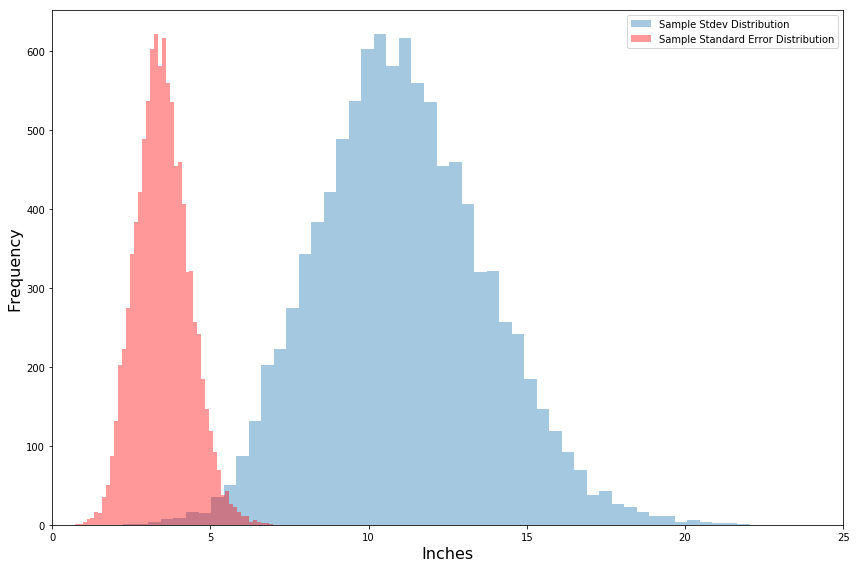

In [11]:
# Check out the distribution of standard errors
SE_dist = vol_dist/height_surveys.shape[1]**0.5

# Histogram that shows the distribution of sample stdev
fig, ax = plt.subplots(figsize=(12,8))
sns.distplot(vol_dist, kde=False, 
             label='Sample Stdev Distribution')

# Histogram that shows the distribution of standard error
sns.distplot(SE_dist, kde=False, color='red',
             label='Sample Standard Error Distribution')

ax.set_xlim([0, 25])
ax.set_xlabel("Inches",fontsize=16)
ax.set_ylabel("Frequency",fontsize=16)
plt.legend()
plt.tight_layout()

plt.savefig(fname='SE_dist', dpi=150)
plt.show()

## Various Calculations (standard error, etc.)

In [12]:
(np.var(height_surveys[35])**0.5)/(height_surveys.shape[1]**0.5)

3.1499364551919666

In [13]:
np.var(np.mean(height_surveys, axis=1))**0.5

3.786460286934193

In [14]:
np.mean(height_surveys[35])

69.41453336430621

In [15]:
np.var(height_surveys[35])**0.5

9.960973683203532